# Imports

In [1]:
# imports
import numpy as np
import torch
from tueplots import bundles, figsizes
import wandb
import matplotlib.pyplot as plt

import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [2]:
from analysis import sweep2df, RED, BLUE, plot_typography


In [3]:
USETEX = True

In [4]:
plt.rcParams.update(bundles.neurips2022(usetex=USETEX))
plt.rcParams.update({
    'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
                            r'\usepackage{amsmath}'] # boldsymbol
})

In [5]:
plot_typography(usetex=USETEX, small=12, medium=16, big=20)

In [6]:
# Constants
ENTITY = "causal-representation-learning"
PROJECT = "sam_test"

# W&B API
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)

# Data loading

In [18]:
SWEEP_ID = "e0geelo2" #"qqqqlma7"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sam_vae_{SWEEP_ID}"
df_sam_vae, sam_val_loss, sam_val_scale_inv = sweep2df(sweep.runs, filename, save=True, load=False)

In [19]:
df_sam_vae

,name,sam_update,rae_update,tie_grad_coeff_sam,seed_everything,enc_var,val_scale_inv,min_val_scale_inv,val_scale_inv4min_val_loss,val_loss,min_val_loss,val_kl,val_recon_loss,val_recon_loss_sam,val_recon_loss_no_sam
0,feasible-sweep-20,True,False,False,87645,0,9.906820e-07,9.436699e-07,9.436699e-07,0.162254,0.150448,0.010296,0.108851,0.151957,0.066356
1,solar-sweep-19,True,False,False,35684,0,1.190764e-06,1.166274e-06,1.166274e-06,0.093812,0.092462,0.009276,0.076236,0.084537,0.064730
2,snowy-sweep-17,True,False,False,89,0,1.544715e-06,1.544715e-06,1.544715e-06,0.083787,0.083787,0.008827,0.072675,0.074960,0.064104
3,different-sweep-18,True,False,False,654,0,1.561307e-06,1.561307e-06,1.561307e-06,0.098607,0.098607,0.010894,0.079129,0.087713,0.069495
4,brisk-sweep-12,True,False,False,42,0,1.128656e-06,1.128656e-06,1.128656e-06,0.088657,0.088657,0.008265,0.076390,0.080391,0.064238
5,woven-sweep-16,True,False,False,23567,0,1.164164e-06,1.164164e-06,1.164164e-06,0.084581,0.084581,0.008682,0.073386,0.075899,0.068563
6,bumbling-sweep-13,True,False,False,64,0,1.168540e-06,1.168540e-06,1.168540e-06,0.138777,0.138777,0.009714,0.096572,0.129063,0.070095
7,devout-sweep-15,True,False,False,5748,0,1.299128e-06,1.299128e-06,1.299128e-06,0.093286,0.093286,0.008922,0.076335,0.084363,0.064297
8,eternal-sweep-14,True,False,False,982,0,8.875007e-07,8.875007e-07,8.875007e-07,0.095977,0.095977,0.009351,0.077197,0.086627,0.070150
9,wild-sweep-30,False,False,False,87645,0,5.100433e-07,5.100433e-07,5.100433e-07,0.062055,0.062055,0.006396,0.055659,0.073046,0.060663


In [21]:
SWEEP_ID = "4aggfh82"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"fix_enc_var_sweep_{SWEEP_ID}"
df_fix_enc_var, fix_enc_val_loss, fix_enc_val_scale_inv = sweep2df(sweep.runs, filename, save=True, load=False)

In [46]:
SWEEP_ID = "kmnl40of" #"1agmyttm"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"rae_sweep_{SWEEP_ID}"
df_rae, rae_val_loss, rae_val_scale_inv = sweep2df(sweep.runs, filename, save=True, load=False)

# Pre-processing


In [23]:
enc_vars = df_fix_enc_var.enc_var.unique()


## SAM and VAE sanity check

In [24]:
scale_no_sam = sam_val_scale_inv[ df_sam_vae.sam_update ==False]
scale_sam = sam_val_scale_inv[df_sam_vae.sam_update ==True]

loss_no_sam = sam_val_loss[ df_sam_vae.sam_update ==False]
loss_sam = sam_val_loss[df_sam_vae.sam_update ==True]

## Fix encoder variance

In [25]:
scale_enc_var_no_sam = {var: fix_enc_val_scale_inv[(df_fix_enc_var.enc_var == var) & (df_fix_enc_var.sam_update ==False)] for var in enc_vars}
scale_enc_var_sam = {var: fix_enc_val_scale_inv[(df_fix_enc_var.enc_var == var) & (df_fix_enc_var.sam_update ==True)] for var in enc_vars}

loss_enc_var_no_sam = {var: fix_enc_val_loss[(df_fix_enc_var.enc_var == var) & (df_fix_enc_var.sam_update ==False)] for var in enc_vars}
loss_enc_var_sam = {var: fix_enc_val_loss[(df_fix_enc_var.enc_var == var) & (df_fix_enc_var.sam_update ==True)] for var in enc_vars}

## RAE

In [47]:
scale_rae = {var: rae_val_scale_inv[df_rae.enc_var == var] for var in enc_vars}
loss_rae = {var: rae_val_loss[df_rae.enc_var == var] for var in enc_vars}

# Plots

## SAM and VAE sanity check

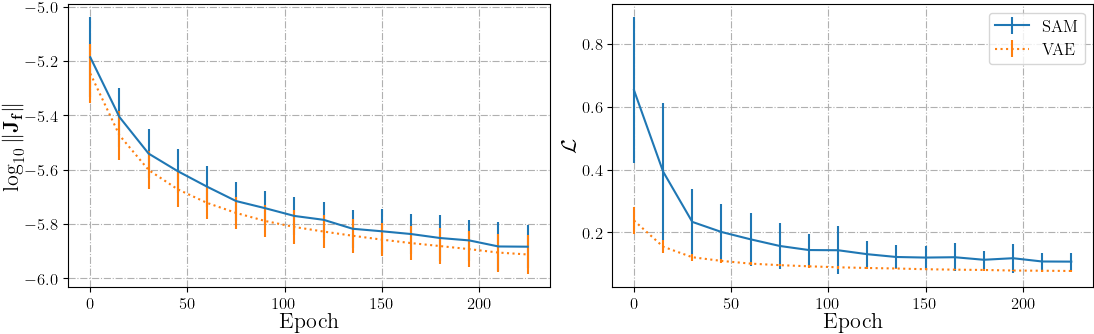

In [27]:
LABELPAD = 1
TICK_PADDING = 2
COLORS = ["tab:blue","tab:orange","tab:green","tab:red"]
val_epoch_factor = 15

fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=2, rel_width=2)['figure.figsize'])

"""Loss and inv scale"""
ax = fig.add_subplot(121)
ax.grid(True, which="both", ls="-.")


if len(scale_sam) > 0:
    val_epoch_ticks = range(0, scale_sam.shape[1] * val_epoch_factor, val_epoch_factor)
    ax.errorbar(val_epoch_ticks, np.log10(scale_sam).mean(0), np.log10(scale_sam).std(0), c=COLORS[0], label=f"SAM", ls="-")
    ax.errorbar(val_epoch_ticks, np.log10(scale_no_sam).mean(0), np.log10(scale_no_sam).std(0), c=COLORS[1], label="VAE", ls=":")


ax.set_xlabel("Epoch", labelpad=LABELPAD)
ax.set_ylabel("$\log_{10}\Vert\mathrm{\mathbf{J}}_{\mathbf{f}}\Vert$", labelpad=LABELPAD)


ax = fig.add_subplot(122)
ax.grid(True, which="both", ls="-.")


if len(loss_sam) > 0:
    val_epoch_ticks = range(0, loss_sam.shape[1] * val_epoch_factor, val_epoch_factor)
    ax.errorbar(val_epoch_ticks, loss_sam.mean(0), loss_sam.std(0), c=COLORS[0], label=f"SAM", ls="-")
    ax.errorbar(val_epoch_ticks, loss_no_sam.mean(0), loss_no_sam.std(0), c=COLORS[1], label="VAE", ls=":")



ax.set_xlabel("Epoch", labelpad=LABELPAD)
ax.set_ylabel("$\mathcal{L}$", labelpad=LABELPAD)


plt.legend(loc="upper right")
plt.savefig("loss_grad_sam_no_sam.svg")

## Fix encoder variance

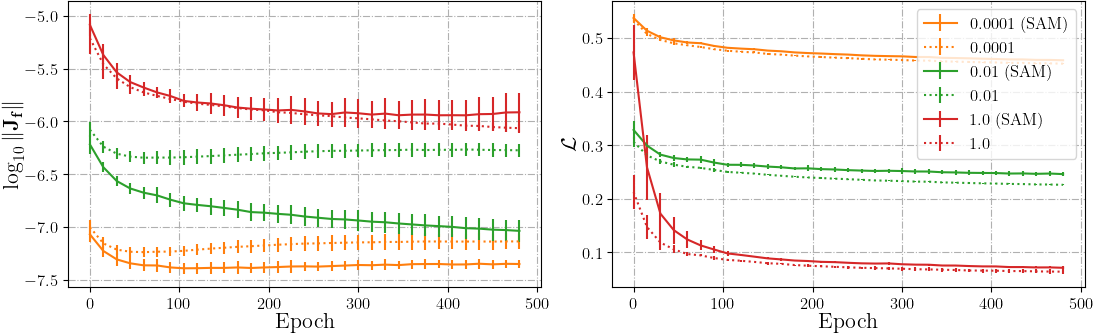

In [28]:
LABELPAD = 1
TICK_PADDING = 2
COLORS = ["tab:blue","tab:orange","tab:green","tab:red"]
val_epoch_factor = 15

fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=2, rel_width=2)['figure.figsize'])

"""Loss and inv scale"""
ax = fig.add_subplot(121)
ax.grid(True, which="both", ls="-.")



for (var, inv_scale_sam), inv_scale_no_sam, inv_scale_rae, color in zip(scale_enc_var_sam.items(),scale_enc_var_no_sam.values(), scale_rae.values(), COLORS):
    if len(inv_scale_sam) > 0:
        val_epoch_ticks = range(0, len(inv_scale_sam[0]) * val_epoch_factor, val_epoch_factor)
        ax.errorbar(val_epoch_ticks, np.log10(inv_scale_sam).mean(0), np.log10(inv_scale_sam).std(0), c=color, label=f"{var} (SAM)", ls="-")
        ax.errorbar(val_epoch_ticks, np.log10(inv_scale_no_sam).mean(0), np.log10(inv_scale_no_sam).std(0), c=color, label=str(var), ls=":")

        # val_epoch_ticks = range(0, len(inv_scale_rae[0]) * val_epoch_factor, val_epoch_factor)
        # ax.errorbar(val_epoch_ticks, np.log10(inv_scale_rae).mean(0), np.log10(inv_scale_rae).std(0), c=color, label=f"{var} (RAE)", ls="-.")


ax.set_xlabel("Epoch", labelpad=LABELPAD)
ax.set_ylabel("$\log_{10}\Vert\mathrm{\mathbf{J}}_{\mathbf{f}}\Vert$", labelpad=LABELPAD)


ax = fig.add_subplot(122)
ax.grid(True, which="both", ls="-.")

for (var, l_sam), l_no_sam, l_rae, color in zip(loss_enc_var_sam.items(), loss_enc_var_no_sam.values(), loss_rae.values(), COLORS):
    if len(l_sam) > 0:
        val_epoch_ticks = range(0, len(l_sam[0]) * val_epoch_factor, val_epoch_factor)
        ax.errorbar(val_epoch_ticks, l_sam.mean(0), l_sam.std(0), c=color, label=f"{var} (SAM)", ls="-")
        ax.errorbar(val_epoch_ticks, l_no_sam.mean(0), l_no_sam.std(0), c=color, label=str(var), ls=":")

        # val_epoch_ticks = range(0, len(l_rae[0]) * val_epoch_factor, val_epoch_factor)
        # ax.errorbar(val_epoch_ticks, np.log10(l_rae).mean(0), np.log10(l_rae).std(0), c=color, label=f"{var} (RAE)", ls="-.")




ax.set_xlabel("Epoch", labelpad=LABELPAD)
ax.set_ylabel("$\mathcal{L}$", labelpad=LABELPAD)


plt.legend(loc="upper right")
plt.savefig("loss_grad_fix_enc_var.svg")

## RAE

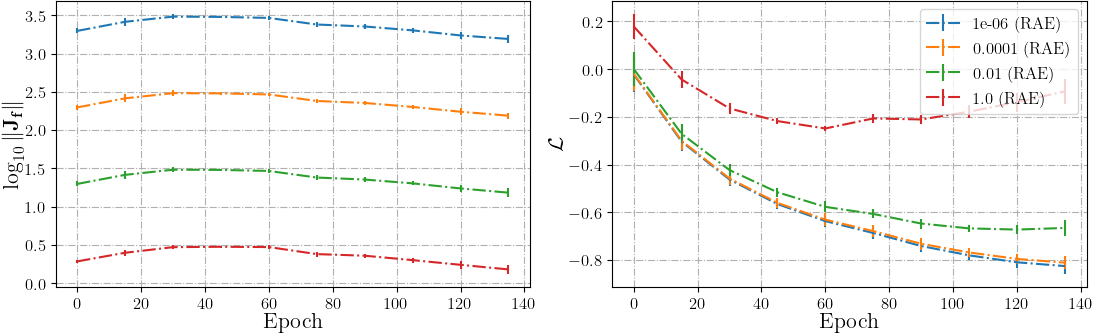

In [48]:
LABELPAD = 1
TICK_PADDING = 2
COLORS = ["tab:blue","tab:orange","tab:green","tab:red"]
val_epoch_factor = 15

fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=2, rel_width=2)['figure.figsize'])

"""Loss and inv scale"""
ax = fig.add_subplot(121)
ax.grid(True, which="both", ls="-.")



for (var, inv_scale_rae), color in zip(scale_rae.items(), COLORS):
    if len(inv_scale_rae) > 0:
        val_epoch_ticks = range(0, len(inv_scale_rae[0]) * val_epoch_factor, val_epoch_factor)
        ax.errorbar(val_epoch_ticks, np.log10(inv_scale_rae).mean(0), np.log10(inv_scale_rae).std(0), c=color, label=f"{var} (RAE)", ls="-.")


ax.set_xlabel("Epoch", labelpad=LABELPAD)
ax.set_ylabel("$\log_{10}\Vert\mathrm{\mathbf{J}}_{\mathbf{f}}\Vert$", labelpad=LABELPAD)


ax = fig.add_subplot(122)
ax.grid(True, which="both", ls="-.")

for (var, l_rae), color in zip(loss_rae.items(), COLORS):
    if len(l_rae) > 0:
        val_epoch_ticks = range(0, len(l_rae[0]) * val_epoch_factor, val_epoch_factor)
        ax.errorbar(val_epoch_ticks, np.log10(l_rae).mean(0), np.log10(l_rae).std(0), c=color, label=f"{var} (RAE)", ls="-.")




ax.set_xlabel("Epoch", labelpad=LABELPAD)
ax.set_ylabel("$\mathcal{L}$", labelpad=LABELPAD)


plt.legend(loc="upper right")
plt.savefig("loss_grad_rae.svg")